<a href="https://colab.research.google.com/github/graciemwilliams/DS2022/blob/main/gss_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).



In [ ]:
import pandas as pd
# 1988 seems to be the turning point year
var_list = ['year', 'age', 'wrkstat', 'marital', 'spwrksta', 'childs', 'race', 'sex', 'hompop', 'income', 'drink6up', 'rosaries', 'agape1', 'selfish', 'actupset']
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

# download the output filename
from google.colab import files
files.download(output_filename)

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('selected_gss_data2.csv')

Saving selected_gss_data2.csv to selected_gss_data2 (1).csv


<ipython-input-5-567c172799b0>:5: DtypeWarning: Columns (10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('selected_gss_data2.csv')


In [ ]:
df.head()

,year,age,wrkstat,marital,spwrksta,childs,race,sex,hompop,income,drink6up,rosaries,agape1,selfish,actupset
0,1972,23.0,working full time,never married,NaN,0.0,white,female,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,70.0,retired,married,keeping house,5.0,white,male,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,48.0,working part time,married,working full time,4.0,white,female,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1972,27.0,working full time,married,working full time,0.0,white,female,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,61.0,keeping house,married,"with a job, but not at work because of tempora...",2.0,white,female,2.0,NaN,NaN,NaN,NaN,NaN,NaN


## Variables I Chose and Why

I chose 15 variables for the data frame that I made. Ten of the variables were pretty common information for surveys: year, age, working status, marital status, spouses work status, number of children, race, sex, income, and number of people living in your home. I picked these variables because I knew that they were ones that I could easily think of ways to graph and would provide interesting results. I was especially interested in comparing the changes in working status for females over the course of 1973-2022 to see the differences in what were identified as professions. As I was scrolling through the General Social Survey, I noticed a lot of really strange questions and picked the five that I thought were quite silly or would maybe have interesting answers. They were: do you drink more than 6 alcoholic drinks a day, to what extent to you agree or disagree with the following statement? Catholic rosaries and holy medals are superstitious, to what extent to you agree or disagree with the following statement? I would rather suffer myself than let the one I love suffer, are you a selfish person, and people at work throw things, slam doors, or hit objects when they are upset with me. I just could not believe that these were survey questions and that people were actually responding to them. One interesting thing was that these last five survey questions all only had responses for the 2004 survey and either were not asked or people just refused to respond to them for all of the other years. One other interesting thing was regarding the income variable which had a minimum option of less than 1000 dollars and a maximum of above 25000 dollars. After some internet research on inflation, I found that when the survey began in the 1970s having an annual income of 25000 is the equivalent of making $177000 dollars in today's money so you would have been considered very wealthy. 25,000 dollars did not end being considered wealthy until the 1990s and it wasn't until the early 2000s that it stopped being middle class income level. The categories for income remained the same for the almost 50 years the survey data spans, so the income variable ceases to provide any useful demographic information after the 2000s.

## Cleaning up the data

In [ ]:
# 4. Produce some numeric summaries and visualizations. (1-3 pages)
# 5. Describe your findings in 1-2 pages.

In [56]:
# find how many unique years there are
df['year'].unique()

# find out how many ages there are and the counts
df['age'].unique()
df['age'].value_counts()

# find the minimum age and maximum age
print(df['age'].min())
print(df['age'].max())

# see how many NaN there are for age
df['age'].isna().sum()


18.0
89.0


0

###Start Cleaning

In [57]:
# remove any rows that have NaN values for age; will be doing a lot of stuff for age and want to have those values
df = df.dropna(subset=['age'])

# remove any rows that have NaN values for sex or for Race
df = df.dropna(subset=['sex'])
df = df.dropna(subset=['race'])
df = df.dropna(subset=['income'])
df = df.dropna(subset=['wrkstat'])
df = df.dropna(subset=['hompop'])

# these are the main variables that I wanted to work with so I just removed variables that did not have those values

In [ ]:
# find the dimension of df
df.shape

(58197, 15)

## Data Visualizations

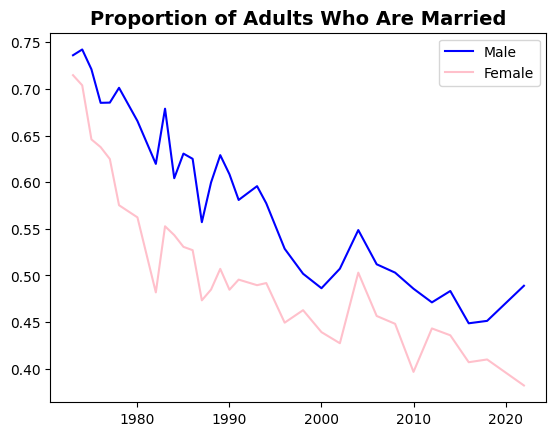

In [ ]:
# make a line chart showing the increase and decrease in numbers of "married" over time
# y variable is the proportion not the counts of "married" entries for each year for women and x is the year
female_data = df[df['sex'] == 'female'].groupby('year')['marital'].value_counts(normalize=True)
fy = female_data.unstack()['married']  # Extract percentages for 'married'

# x variable is the year
x = df['year'].unique()

# plot another line for the status for men
male_data = df[df['sex'] == 'male'].groupby('year')['marital'].value_counts(normalize=True)
my = male_data.unstack()['married']  # Extract percentages for 'married'

plt.plot(x, my, linestyle='-', color='blue')
plt.plot(x, fy, linestyle='-', color='pink')


plt.title('Proportion of Adults Who Are Married', fontsize=14, weight='bold')
plt.legend(['Male', 'Female'])
plt.show()


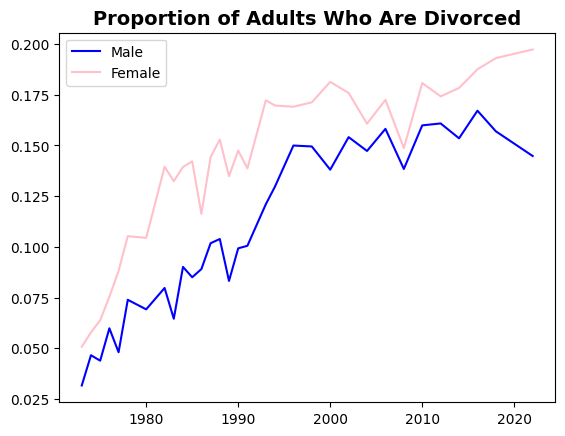

In [ ]:
# make a line chart showing the increase and decrease in numbers of "married" over time
# y variable is the proportion not the counts of "married" entries for each year for women and x is the year
female_data = df[df['sex'] == 'female'].groupby('year')['marital'].value_counts(normalize=True)
fy = female_data.unstack()['divorced']  # Extract percentages for 'married'

# x variable is the year
x = df['year'].unique()

# plot another line for the status for men
male_data = df[df['sex'] == 'male'].groupby('year')['marital'].value_counts(normalize=True)
my = male_data.unstack()['divorced']  # Extract percentages for 'married'

plt.plot(x, my, linestyle='-', color='blue')
plt.plot(x, fy, linestyle='-', color='pink')


plt.title('Proportion of Adults Who Are Divorced', fontsize=14, weight='bold')
plt.legend(['Male', 'Female'])
plt.show()

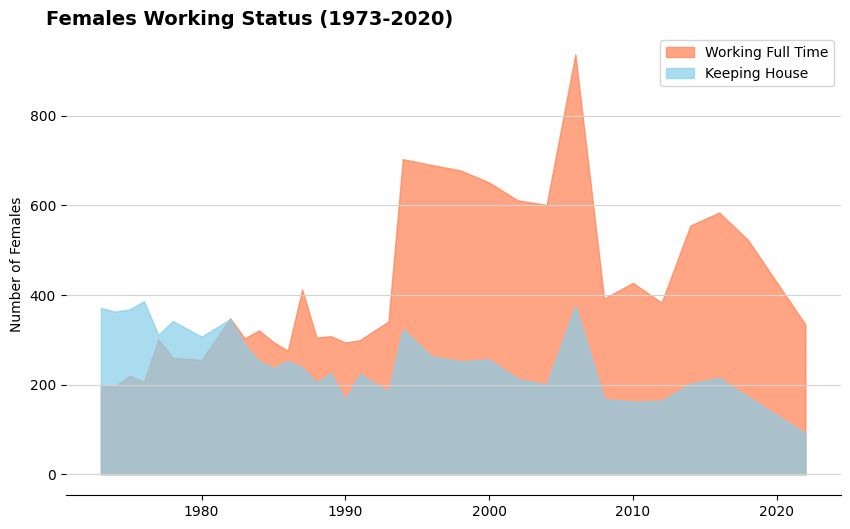

In [93]:
# Filter data for females and 'keeping house' job status
house_data = df[(df['sex'] == 'female') & (df['wrkstat'] == 'keeping house')]

# Group by year and count the occurrences
house_count = house_data.groupby('year')['wrkstat'].count()

# Filter data for females and 'working full time' job status
work_data = df[(df['sex'] == 'female') & (df['wrkstat'] == 'working full time')]

# Group by year and count the occurrences
work_count = work_data.groupby('year')['wrkstat'].count()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.fill_between(work_count.index, work_count.values, color='coral', alpha=0.7, label='Working Full Time')
plt.fill_between(house_count.index, house_count.values, color='skyblue', alpha=0.7, label='Keeping House')
plt.ylabel('Number of Females')
plt.legend()

# Add horizontal gridlines behind the area chart
plt.grid(True, axis='y', zorder=1, color="lightgrey")

# Remove top and right spines, keep x-axis spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# title
plt.title('Females Working Status (1973-2020)', fontsize=14, weight='bold', ha='right')

plt.show()


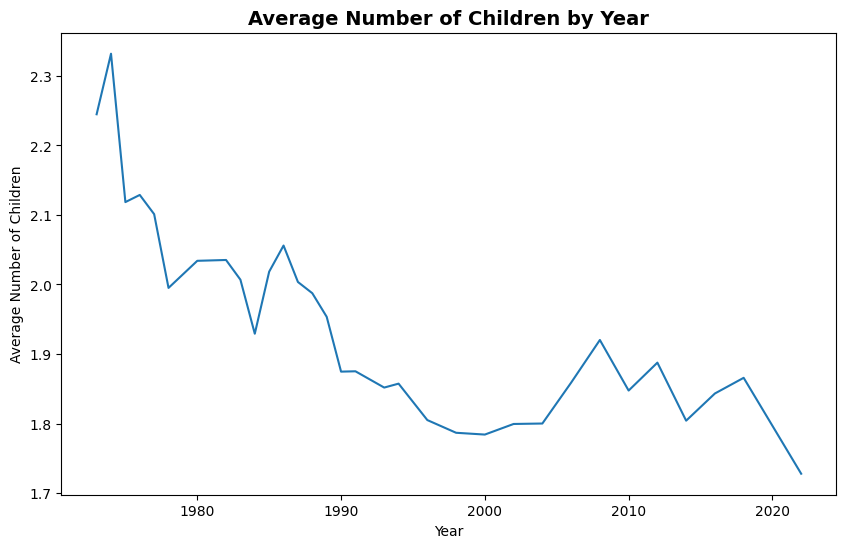

In [48]:
# make a line graph of the average number of children over time
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('year')['childs'].mean())
plt.xlabel('Year')
plt.ylabel('Average Number of Children')
plt.title('Average Number of Children by Year', fontsize=14, weight='bold')
plt.show()

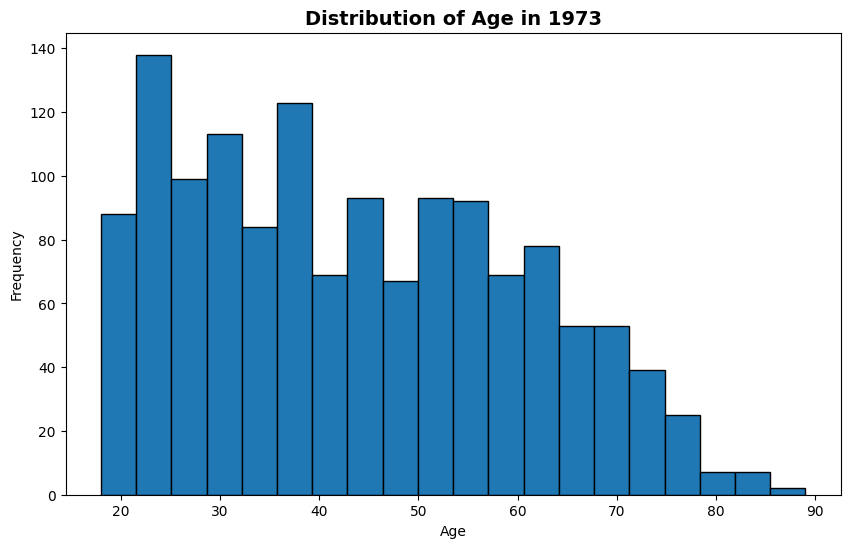

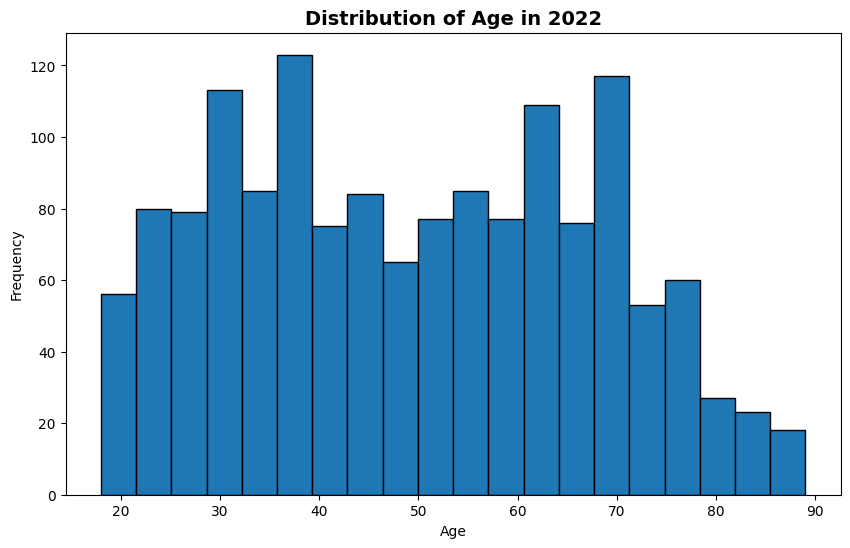

In [55]:
# make a histogram of the distribution of age in 1973
plt.figure(figsize=(10, 6))
plt.hist(df[df['year'] == 1973]['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Distribution of Age in 1973', fontsize=14, weight='bold')
plt.show()

# make a histogram of the distribution of age in 2022
plt.figure(figsize=(10, 6))
plt.hist(df[df['year'] == 2022]['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Distribution of Age in 2022', fontsize=14, weight='bold')
plt.show()


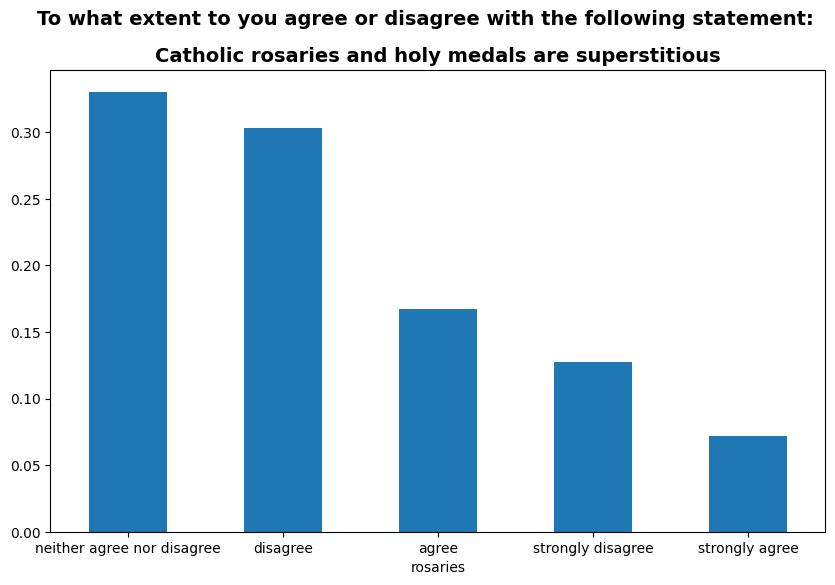

In [81]:
# make a bar chart of the proportion in percentage of responses to the rosaries colum
plt.figure(figsize=(10, 6))


df['rosaries'].value_counts(normalize=True).plot(kind='bar')
plt.title('Catholic rosaries and holy medals are superstitious', fontsize=14, weight='bold')
plt.suptitle('To what extent to you agree or disagree with the following statement:', fontsize=14, weight='bold')

# rotate the x lablel
plt.xticks(rotation=0)
plt.show()

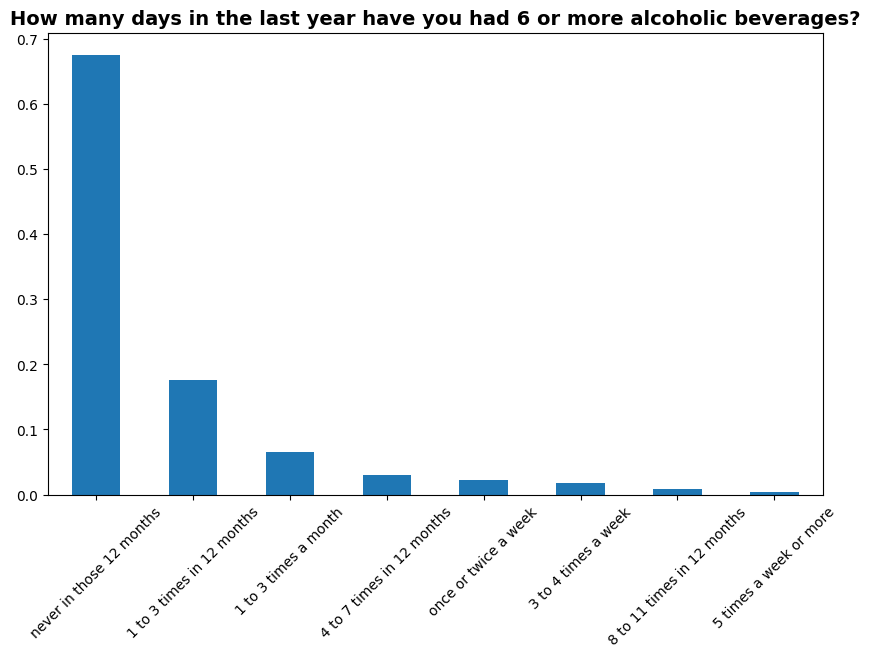

In [89]:
# make a bar chart of the responses to the drink variable
plt.figure(figsize=(10, 6))
df['drink6up'].value_counts(normalize=True).plot(kind='bar')
plt.title('How many days in the last year have you had 6 or more alcoholic beverages?', fontsize=14, weight='bold')

# remove the x label
plt.xlabel('')

# rotate the x lablel
plt.xticks(rotation=45)
plt.show()

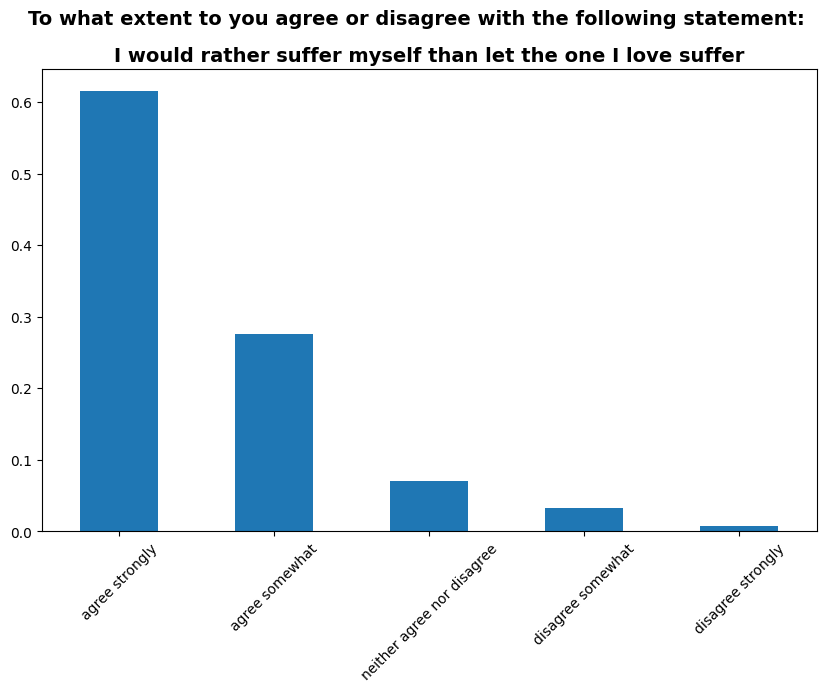

In [90]:
# responses to the suffer variable
plt.figure(figsize=(10, 6))
df['agape1'].value_counts(normalize=True).plot(kind='bar')
plt.title('I would rather suffer myself than let the one I love suffer', fontsize=14, weight='bold')
plt.suptitle('To what extent to you agree or disagree with the following statement:', fontsize=14, weight='bold')

# remove the x label
plt.xlabel('')

# rotate the x lablel
plt.xticks(rotation=45)
plt.show()

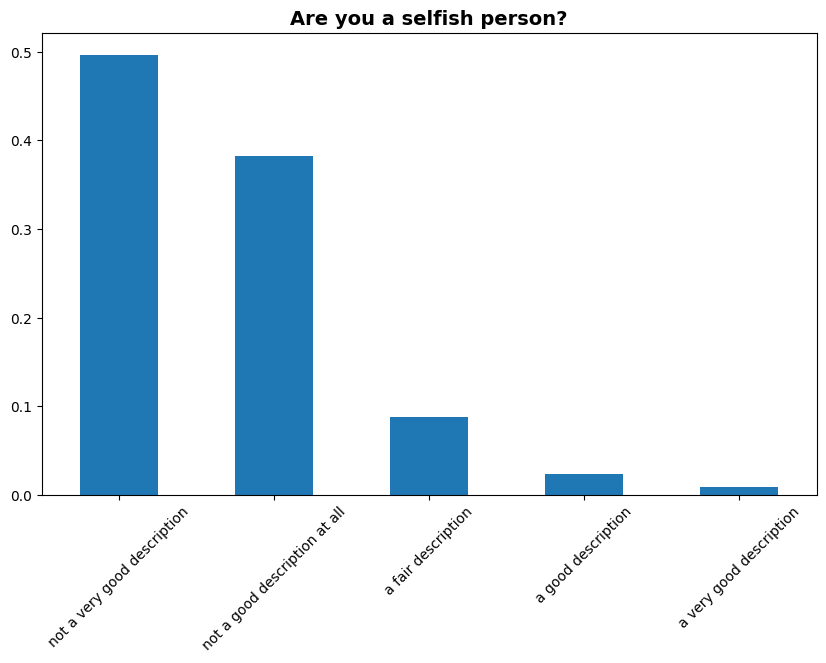

In [91]:
# make a bar chart of the responses to the selfish variable
plt.figure(figsize=(10, 6))
df['selfish'].value_counts(normalize=True).plot(kind='bar')
plt.title('Are you a selfish person?', fontsize=14, weight='bold')

# remove the x label
plt.xlabel('')

# rotate the x lablel
plt.xticks(rotation=45)
plt.show()

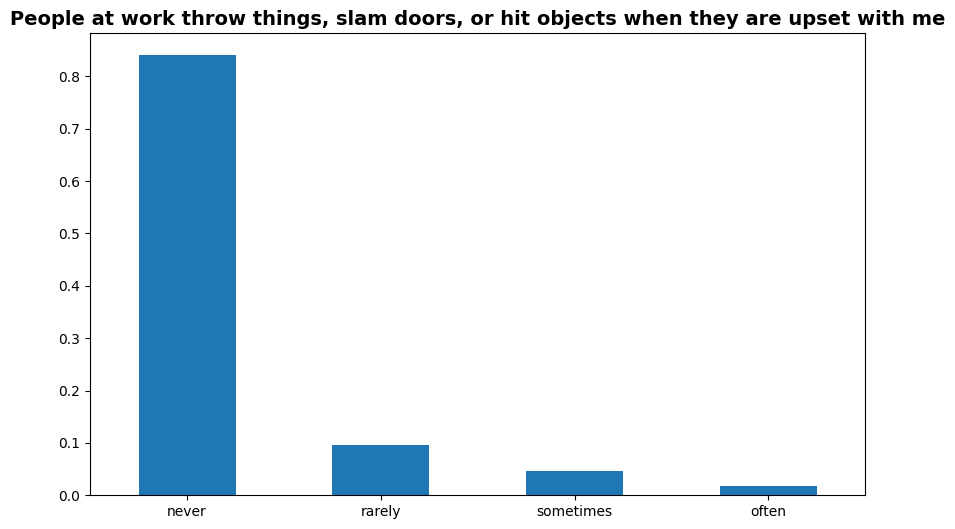

In [92]:
# make a bar chart of the upset variable
plt.figure(figsize=(10, 6))
df['actupset'].value_counts(normalize=True).plot(kind='bar')
plt.title('People at work throw things, slam doors, or hit objects when they are upset with me', fontsize=14, weight='bold')

# remove the x label
plt.xlabel('')

# rotate the x lablel
plt.xticks(rotation=0)
plt.show()

## Findings

The most interesting relationship that I focused on was how women was how the working status of women has changed from the 1970s to the 2020s. The area chart was cool because it showed the differences between the number of females who were working full time versus the number of females who were keeping house and you could clearly see through the area how they compared to each other. Making the marriage and divorce graphs were actually a little bit depressing. It was evident the strong decline in marriage over the course of te 50 yeas and the strong increase in divorces as the years went on. It was interesting to see how females had a much lower rate of marriage than men and a much higher rate of divorce because I thought initially that it would be flipped. The average number of children decreasing also suprised me that it would be that low because I know that replacement rate is 2.1 and the graph shows the average hitting below that before 1980 and it never went above again. The graphs of the last five variables that I selected made me laugh when I plotted them and also made me slightly concerned. The last graph in particular had me worried for the almost 15% of people who have had people throw, slam, or hit things when they are upset with the respondent. The number of people who self-identified as selfish people also had me concerned.